In [41]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.8 MB/s eta 0:00:00


In [43]:
#install lamguage processing toolkit 

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kirth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [65]:
!pip install mysql-connector-python

  Using cached mysql_connector_python-9.2.0-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
Using cached mysql_connector_python-9.2.0-cp312-cp312-win_amd64.whl (16.1 MB)


In [124]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('amazon.csv')

In [9]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [11]:
#print missing values

df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [5]:
df = df.dropna(subset=['review_content'])

In [7]:
#  Remove ₹ symbols and commas from price columns
df['discounted_price'] = df['discounted_price'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '', x))
df['actual_price'] = df['actual_price'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '', x))

In [17]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280,3045,25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-

In [9]:
#  Convert prices to numbers (float)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [21]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the 

In [11]:
#  Combine review_title + review_content into one column
df['full_review'] = df['review_title'].fillna('') + ' ' + df['review_content'].fillna('')

In [25]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,full_review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,"Received the product without spanner,Excellent..."
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeApplia

In [13]:
#  Keep only necessary columns
df_cleaned = df[['product_name', 'category', 'rating', 'full_review']]

In [29]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,full_review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second..."


In [31]:
df_cleaned.head()

,product_name,category,rating,full_review
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second..."


In [15]:
#  Save the cleaned file (optional)
df_cleaned.to_csv('cleaned_reviews.csv', index=False)

In [35]:
print("✅ Data cleaned and saved successfully!")

✅ Data cleaned and saved successfully!


Sentiment Analysis using Python (TextBlob)

In [14]:
#  Load the cleaned CSV (from above step)
df = pd.read_csv('cleaned_reviews.csv')

In [49]:
df.head()

,product_name,category,rating,full_review
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second..."


In [17]:
#  Create a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

In [19]:
# Apply the function to the full_review column
df['polarity'] = df['full_review'].apply(get_sentiment)

In [20]:
#  Create a new column for sentiment label
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)

In [23]:
# Check result
print(df[['full_review', 'polarity', 'sentiment']].head())

                                         full_review  polarity sentiment
0  Satisfied,Charging is really fast,Value for mo...  0.473958  Positive
1  A Good Braided Cable for Your Type C Device,Go...  0.294589  Positive
2  Good speed for earlier versions,Good Product,W...  0.500000  Positive
3  Good product,Good one,Nice,Really nice product...  0.331795  Positive
4  As good as original,Decent,Good one for second...  0.260013  Positive


In [25]:
# Save it for MySQL and Power BI use
df.to_csv('sentiment_reviews.csv', index=False)

In [61]:
# window key + . ----> emojis

print("✅ Sentiment analysis completed and file saved!")

✅ Sentiment analysis completed and file saved!


In [27]:
# insert cleaned data into mysql

# Load the cleaned data again 
df = pd.read_csv("cleaned_reviews.csv")

In [29]:
# Load cleaned reviews (no sentiment column)
df_cleaned = pd.read_csv("cleaned_reviews.csv")

# Load sentiment results (includes 'sentiment' column)
df_sentiment = pd.read_csv("sentiment_reviews.csv")

# Check shape or preview
print(df_cleaned.shape)
print(df_sentiment.shape)
df_cleaned.head()
df_sentiment.head()

(1465, 4)
(1465, 19)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,full_review,polarity,sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",0.473958,Positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",0.294589,Positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...",0.500000,Positive
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...",0.331795,Positive
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...",0.260013,Positive


Merge both dataframes 

Since both datasets contain the same products in the same order, we can simply concatenate sentiment columns into the cleaned DataFrame.

In [31]:
# Just select the columns we need from sentiment df
df_sentiment_info = df_sentiment[['polarity', 'sentiment']]

# Combine the sentiment info with the cleaned reviews
df_combined = pd.concat([df_cleaned, df_sentiment_info], axis=1)

# Optional: Add a review_id column if it's missing
df_combined.reset_index(inplace=True)
df_combined.rename(columns={'index': 'review_id'}, inplace=True)

df_combined.head()

,review_id,product_name,category,rating,full_review,polarity,sentiment
0,0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo...",0.473958,Positive
1,1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go...",0.294589,Positive
2,2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W...",0.500000,Positive
3,3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product...",0.331795,Positive
4,4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second...",0.260013,Positive


Convert rating to float 

errors='coerce' will turn any non-numeric values into NaN, so you can easily clean them.

In [35]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [37]:
# drop rows with NaN in rating 
df = df.dropna(subset=['rating'])

In [39]:
print(df['rating'].dtype)   # should now be float64
print(df['rating'].isnull().sum())  # should be 0

float64
0


Connect to Mysql 

In [43]:
df['review_id'] = df.index + 1


In [45]:
df.head()

,product_name,category,rating,full_review,review_id
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo...",1
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go...",2
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W...",3
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product...",4
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second...",5


In [53]:
df = df_combined
df['review_id'] = df.index + 1


In [55]:
df.head()

,review_id,product_name,category,rating,full_review,polarity,sentiment
0,1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo...",0.473958,Positive
1,2,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go...",0.294589,Positive
2,3,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W...",0.500000,Positive
3,4,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product...",0.331795,Positive
4,5,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second...",0.260013,Positive


In [99]:
connection = mysql.connector.connect(
    host="localhost",      
    user="root",            
    password="2211"  
)

cursor = connection.cursor()

In [59]:
# Create database

cursor.execute("CREATE DATABASE IF NOT EXISTS amazon_reviews")
cursor.execute("USE amazon_reviews")

In [103]:
cursor.execute("USE amazon_reviews")

In [77]:
# create table 

create_table_query = """
CREATE TABLE IF NOT EXISTS product_reviews (
   review_id INT PRIMARY KEY,
    product_name TEXT,
    category TEXT,
    rating FLOAT,
    full_review TEXT,
    polarity FLOAT,
    sentiment VARCHAR(10)
)
"""
cursor.execute(create_table_query)

In [105]:
df.head()

,review_id,product_name,category,rating,full_review,polarity,sentiment
0,1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo...",0.473958,Positive
1,2,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go...",0.294589,Positive
2,3,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W...",0.500000,Positive
3,4,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product...",0.331795,Positive
4,5,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second...",0.260013,Positive


In [87]:
# check datatype of rating 
print(df_combined['rating'].unique())
print(df_combined['rating'].dtype)

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']
object


In [89]:
# change rating from object to float 

# Remove non-numeric values and convert to float
df_combined['rating'] = pd.to_numeric(df_combined['rating'], errors='coerce')

# Optionally fill NaN ratings with 0 or drop them
df_combined = df_combined.dropna(subset=['rating'])  # or use fillna(0)
df_combined['rating'] = df_combined['rating'].astype(float)

C:\Users\kirth\AppData\Local\Temp\ipykernel_131416\2539365362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['rating'] = df_combined['rating'].astype(float)


In [107]:
print(df_combined['rating'].dtype)

float64


In [109]:
cursor.execute("TRUNCATE TABLE product_reviews")
connection.commit()


In [111]:
# Now insert 

for index, row in df_combined.iterrows():
    insert_query = """
    INSERT INTO product_reviews (review_id, product_name, category, rating, full_review, polarity, sentiment)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row['review_id'],
        row['product_name'],
        row['category'],
        row['rating'],
        row['full_review'],
        row['polarity'],
        row['sentiment']
    )
    cursor.execute(insert_query, values)

connection.commit()
cursor.close()
connection.close()
print("✅ Data uploaded to MySQL successfully!")


✅ Data uploaded to MySQL successfully!


In [46]:
# data truncated - rating error

print(df['rating'].head(10))
print(df['rating'].dtype)

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
5    3.9
6    4.1
7    4.3
8    4.2
9    4.0
Name: rating, dtype: float64
float64


In [50]:
print(df.columns)

Index(['product_name', 'category', 'rating', 'full_review'], dtype='object')


In [52]:
# add review id 

df['review_id'] = df.index + 1

In [54]:
df.columns

Index(['product_name', 'category', 'rating', 'full_review', 'review_id'], dtype='object')

In [58]:
df.head()

,product_name,category,rating,full_review,review_id
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Satisfied,Charging is really fast,Value for mo...",1
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"A Good Braided Cable for Your Type C Device,Go...",2
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Good speed for earlier versions,Good Product,W...",3
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,Good one,Nice,Really nice product...",4
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"As good as original,Decent,Good one for second...",5


In [86]:
df.columns

Index(['product_name', 'category', 'rating', 'full_review', 'review_id',
       'polarity', 'sentiment'],
      dtype='object')

Python EDA 

In [88]:
# 1. What’s the Overall Sentiment Distribution?

sentiment_counts = df['sentiment'].value_counts()

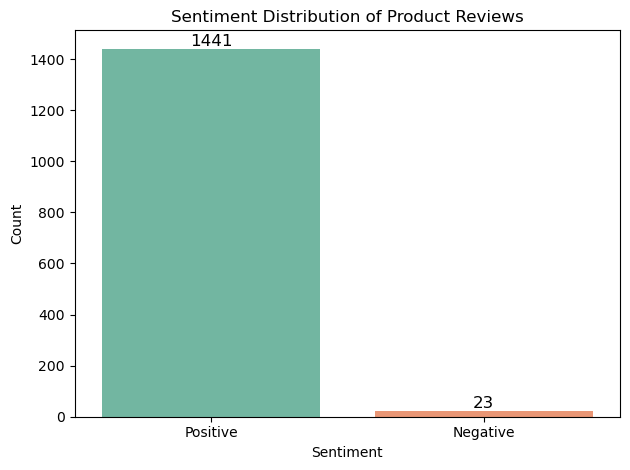

In [98]:
# Create the countplot with hue and palette
ax = sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Product Reviews')
plt.tight_layout()
plt.show()

2. How Does Sentiment Correlate with Product Ratings?

   Goal: Do positive reviews usually give higher ratings?

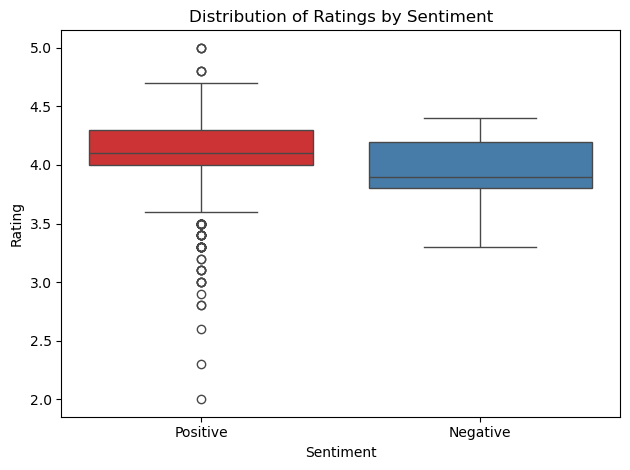

In [104]:
# Create a boxplot showing rating distribution for each sentiment
sns.boxplot(data=df, x='sentiment', y='rating', hue='sentiment', palette='Set1', legend=False)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Sentiment')
plt.tight_layout()
plt.show()

In [102]:
avg_rating_by_sentiment = df.groupby('sentiment')['rating'].mean().reset_index()
print(avg_rating_by_sentiment)

  sentiment    rating
0  Negative  3.960870
1  Positive  4.098751


3. Which Categories Have Most Negative or Positive Reviews?

In [106]:
sentiment_by_category = df.groupby(['category', 'sentiment']).size().unstack().fillna(0)

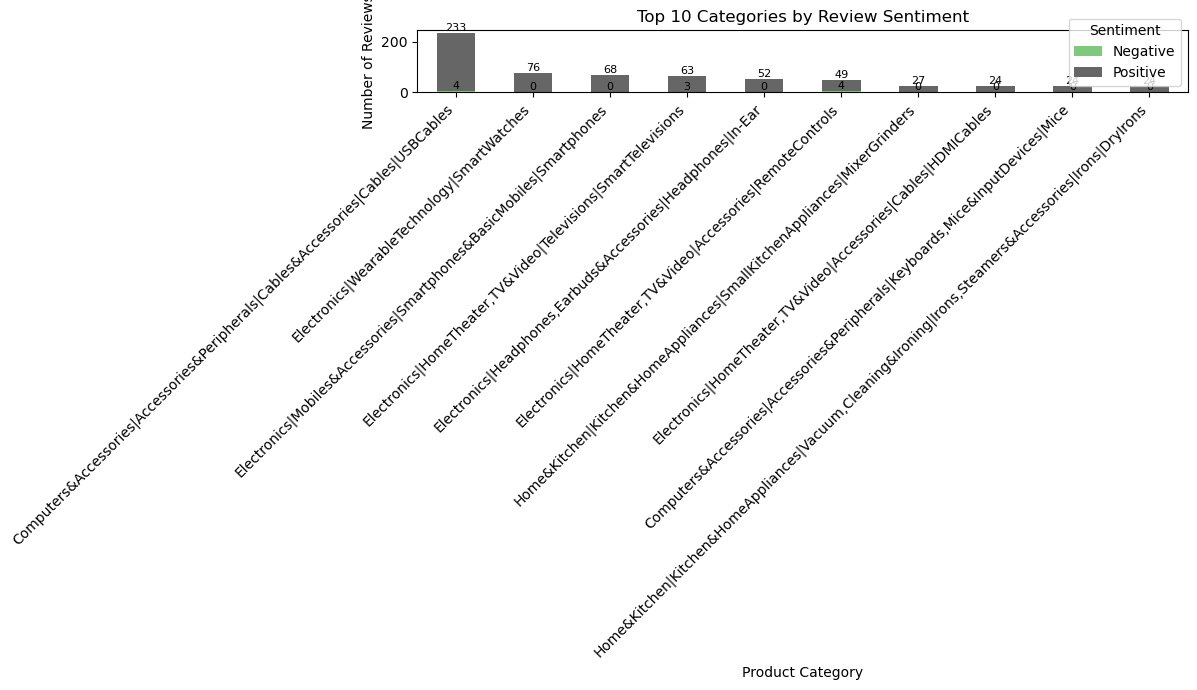

In [120]:
# Plot
ax = top_sentiment_by_category.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Accent'
)

# Add title and labels
plt.title('Top 10 Categories by Review Sentiment')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, color='black')

plt.tight_layout()
plt.show()

Generate Word Cloud (for Negative Sentiment):

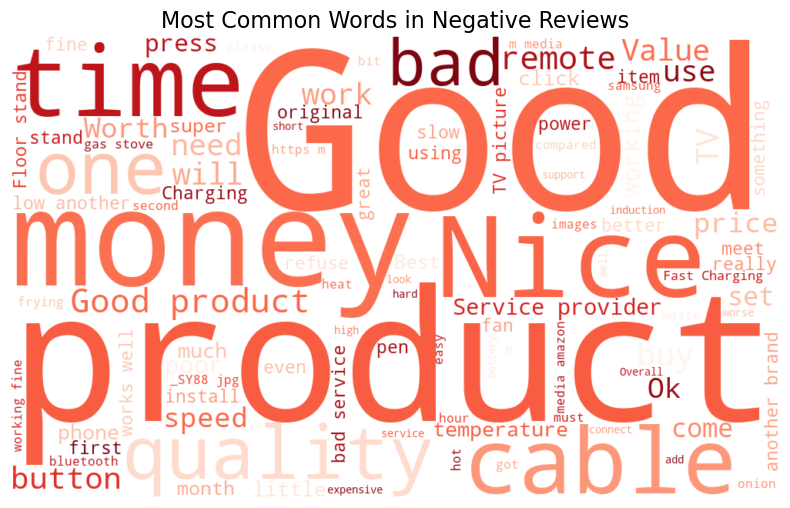

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter only negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']['full_review']

# Combine all negative reviews into one big text
negative_text = " ".join(negative_reviews.astype(str))

# Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='Reds',
    max_words=100
).generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews', fontsize=16)
plt.show()


compare positive vs negative word cloud

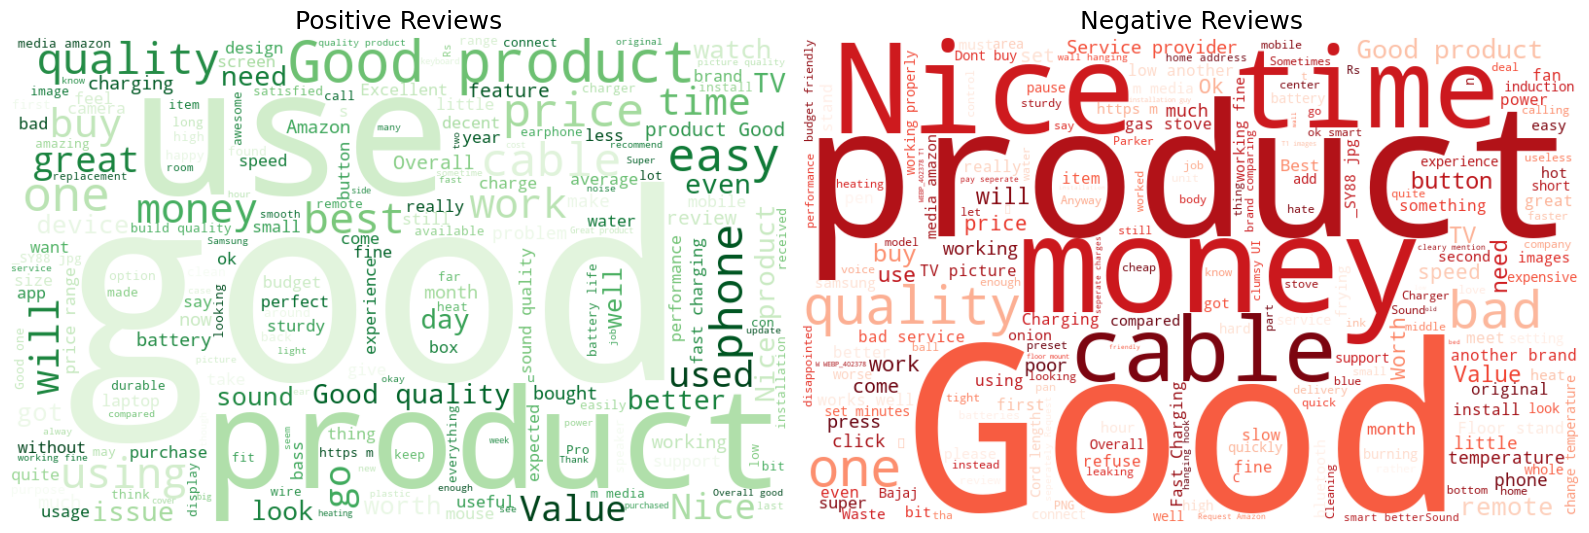

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews
positive_reviews = df[df['sentiment'] == 'Positive']['full_review']
negative_reviews = df[df['sentiment'] == 'Negative']['full_review']

# Combine text
positive_text = " ".join(positive_reviews.astype(str))
negative_text = " ".join(negative_reviews.astype(str))

# Create WordClouds
positive_wc = WordCloud(width=800, height=500, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=500, background_color='white', colormap='Reds').generate(negative_text)

# Plot side-by-side
plt.figure(figsize=(16, 8))

# Positive
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=18)

# Negative
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=18)

plt.tight_layout()
plt.show()


 4. What Are the Top Products Based on Positive Sentiment?

In [130]:
top_positive_products = df[df['sentiment'] == 'Positive']['product_name'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Products with Positive Reviews')

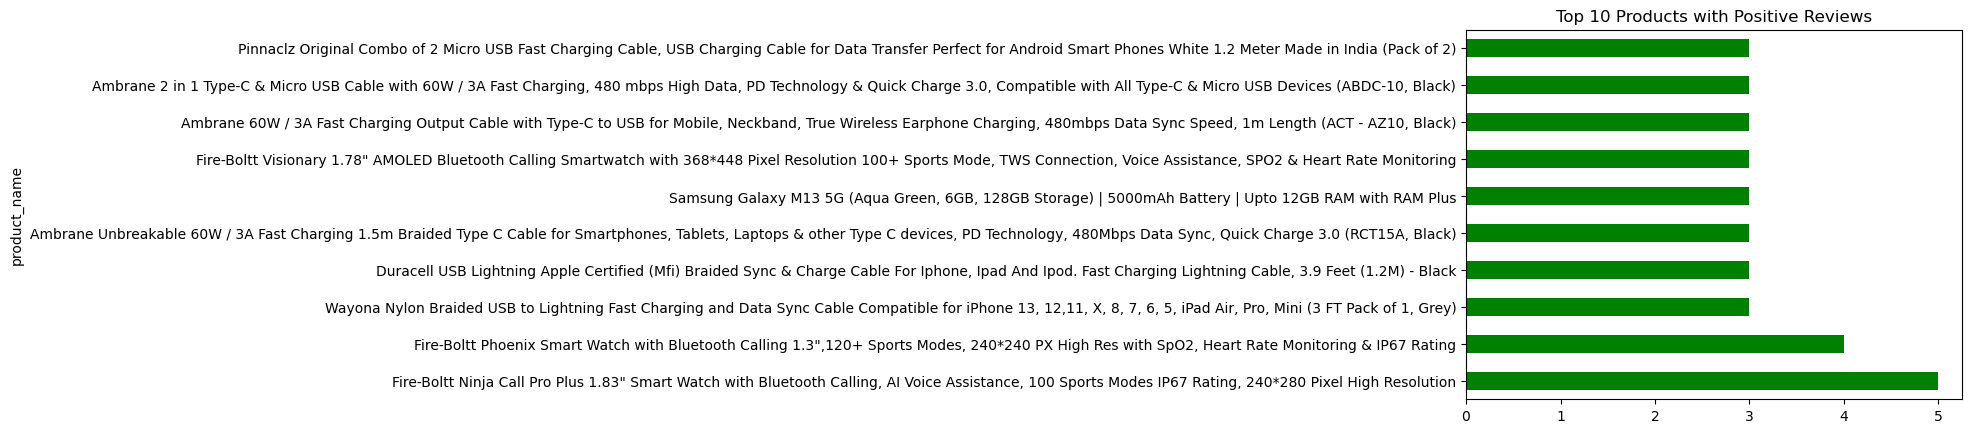

In [132]:
top_positive_products.plot(kind='barh', color='green')
plt.title('Top 10 Products with Positive Reviews')

 5. Are There Patterns in Negative Reviews?

    Goal: Which words appear most in bad reviews?

In [134]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [140]:
# Load standard English stopwords
stop_words = set(stopwords.words('english'))

In [136]:
neg_reviews = " ".join(df[df['sentiment'] == 'Negative']['full_review'].dropna().astype(str))

# take negative reviews and join them in one long sentence

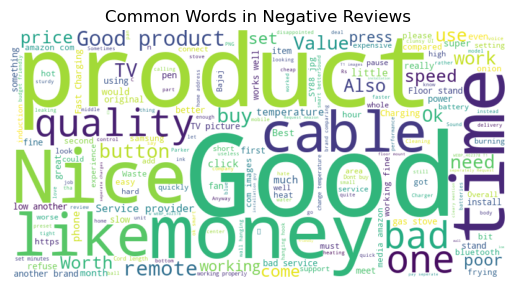

In [142]:
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(neg_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Negative Reviews')
plt.show()